# 3. Model Training with Second Order Optimizers

In [1]:
import sys

sys.path.append("../../")
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np

from m3_learning.nn.random import random_seed
from m3_learning.viz.style import set_style
from m3_learning.viz.printing import printer
from m3_learning.be.viz import Viz
from m3_learning.be.dataset import BE_Dataset
from m3_learning.be.nn import SHO_fit_func_nn, SHO_Model
from m3_learning.optimizers.TrustRegion import TRCG
import m3_learning

printing = printer(basepath = './Figures/')


set_style("printing")
random_seed(seed=42)

%matplotlib inline

2024-06-07 16:35:42.738808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 16:35:43.251802: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/micromamba/envs/paper/lib/python3.10/site-packages/cv2/../../lib64:
2024-06-07 16:35:43.251846: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ferroelectric/micromamba/envs/paper/

printing set for seaborn
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


## Loads Data


In [3]:
# Specify the filename and the path to save the file
filename = "./data_raw_unmod.h5"
save_path = "./Data"


data_path = save_path + "/" + filename

# instantiate the dataset object
dataset = BE_Dataset(data_path, SHO_fit_func_LSQF=SHO_fit_func_nn)

# print the contents of the file
dataset.print_be_tree()

No spectroscopic datasets found as attributes of /Measurement_000/Channel_000/Position_Indices
No position datasets found as attributes of /Raw_Data-SHO_Fit_000/Spectroscopic_Values


/home/ferroelectric/Documents/m3_learning/m3_learning/papers/2023_Rapid_Fitting/../../src/m3_learning/util/preprocessing.py:43: RuntimeWarning: invalid value encountered in divide
  return (data - self.mean)/self.std


/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Noisy_Data_1
    ├ Noisy_Data_2
    ├ Noisy_Data_3
    ├ Noisy_Data_4
    ├ Noisy_Data_5
    ├ Noisy_Data_6
    ├ Noisy_Data_7
    ├ Noisy_Data_8
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spatially_Averaged_Plot_Group_001
      ---------------------------------
      ├ Bin_Frequencies
      ├ Max_Response
      ├ Mean_Spectrogram
      ├ Min_Response
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices
├ Noisy_Data_1_SHO_Fit
  --------

In [4]:
# instantiates the visualization object
BE_viz = Viz(dataset, printing, verbose=True)

## Adahessian

### Pytorch Model

#### Model Architecture


In [5]:
# constructs a test train split
X_train, X_test, y_train, y_test = dataset.test_train_split_(shuffle=True)

random_seed(seed=42)

# instantiate the model
ADAM_model = SHO_Model(dataset, training=True, model_basename="SHO_Fitter_original_data_adahessian")

ADAM_model.fit(
    dataset.X_train,
    5000,
    optimizer="Adam",
    epochs = 5,
)




        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        fitter = LSQF
        scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = None
        NN Phase Shift = None
        Noise Level = 0
        loop interpolated = False
                    
None
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
Using GPU NVIDIA GeForce RTX 3090
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42


/home/ferroelectric/micromamba/envs/paper/lib/python3.10/site-packages/torch/autograd/__init__.py:251: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at ../torch/csrc/autograd/engine.cpp:1171.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Adam
epoch : 1/5, recon loss = 0.28160412
--- 6.550116300582886 seconds ---
Adam
epoch : 2/5, recon loss = 0.04430801
--- 5.930633783340454 seconds ---
Adam
epoch : 3/5, recon loss = 0.04088995
--- 5.88572359085083 seconds ---
Adam
epoch : 4/5, recon loss = 0.03955924
--- 5.960702180862427 seconds ---
Adam
epoch : 5/5, recon loss = 0.03875105
--- 5.9660234451293945 seconds ---


In [6]:
random_seed(seed=42)

# constructs a test train split
X_train, X_test, y_train, y_test = dataset.test_train_split_(shuffle=True)

# instantiate the model
ADAHessian_model = SHO_Model(dataset, training=True, model_basename="SHO_Fitter_original_data_adahessian")

ADAHessian_model.fit(
    dataset.X_train,
    5000,
    optimizer="AdaHessian",
    epochs = 5,
)


Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42

        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        fitter = LSQF
        scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = None
        NN Phase Shift = None
        Noise Level = 0
        loop interpolated = False
                    
None
Using GPU NVIDIA GeForce RTX 3090
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
AdaHessian
epoch : 1/5, recon loss = 0.28632005
--- 9.478692770004272 seconds ---
AdaHessian
epoch : 2/5, recon loss = 0.06110921
--- 9.291969776153564 seconds ---
AdaHessian
epoch : 3/5, recon loss = 0.04914291
--- 9.280213356018066 seconds ---
AdaHessian
epoch : 4/5, recon loss = 0.04542027
--- 8.737337589263916 seconds ---
AdaHessian
epoch : 5/5, recon loss = 0.04341547
--- 9.284188747406006 second

In [7]:
random_seed(seed=42)

# instantiate the model
TR_model = SHO_Model(dataset, training=True, model_basename="SHO_Fitter_original_data_adahessian")

# constructs a test train split
X_train, X_test, y_train, y_test = dataset.test_train_split_(shuffle=True)

Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
Using GPU NVIDIA GeForce RTX 3090

        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        fitter = LSQF
        scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = None
        NN Phase Shift = None
        Noise Level = 0
        loop interpolated = False
                    
None


In [8]:
optimizer = {"name": "TRCG", "optimizer":TRCG, "radius": 5, "device": "cuda","ADAM_epochs": 2}

random_seed(seed=42)

# instantiate the model
TR_model = SHO_Model(dataset, training=True, model_basename="SHO_Fitter_original_data_adahessian")

# constructs a test train split
X_train, X_test, y_train, y_test = dataset.test_train_split_(shuffle=True)

train = True

# if train:
    # fits the model
TR_model.fit(
    dataset.X_train[0:10000],
    5000,
    optimizer=optimizer,
    epochs = 5,
)
# else:
    # ADAHessian_model.load(
    #     "/home/ferroelectric/m3_learning/m3_learning/papers/2023_Rapid_Fitting/Trained Models/SHO Fitter/SHO_Fitter_original_data_model_epoch_5_train_loss_0.0449272525189978.pth"
    # )

Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
Using GPU NVIDIA GeForce RTX 3090

        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        fitter = LSQF
        scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = None
        NN Phase Shift = None
        Noise Level = 0
        loop interpolated = False
                    
None
Pytorch seed was set to 42
Numpy seed was set to 42
tensorflow seed was set to 42
Adam
epoch : 1/5, recon loss = 1.92508870
--- 0.058683156967163086 seconds ---
Adam
epoch : 2/5, recon loss = 1.75325668
--- 0.05794095993041992 seconds ---
Adam
epoch : 3/5, recon loss = 1.58960229
--- 0.05888032913208008 seconds ---
Trust Region CG
epoch : 4/5, recon loss = 1.19388226
--- 0.22779083251953125 seconds ---
Trust Region CG
epoch : 5/5, recon loss = 0.87736735
--- 0.22043156623840332 sec

### Evaluate the Neural Network Results

It is always recommended to validate that the autoencoder is working correctly. We can do this by comparing the different stages of the autoencoder including the raw data, the generated curves.


./Figures/Figure_10_NN_validation_Train.png
./Figures/Figure_10_NN_validation_Train.svg


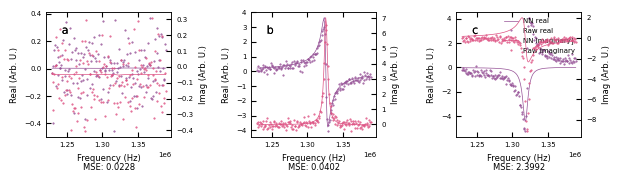

In [9]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_train,
    prediction=ADAHessian_model,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename="Figure_10_NN_validation_Train",
)

./Figures/Figure_10_NN_validation_Train.png
./Figures/Figure_10_NN_validation_Train.svg


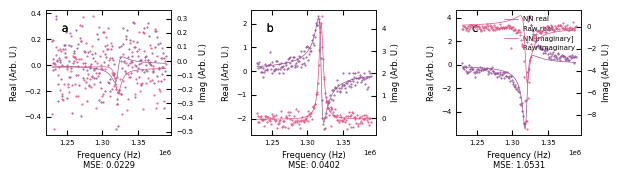

In [10]:
d1, d2, index1, mse1 = BE_viz.bmw_nn(
    X_test,
    prediction=ADAHessian_model,
    out_state={"scaled": True, "raw_format": "complex"},
    returns=True,
    filename="Figure_10_NN_validation_Train",
)


        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        fitter = LSQF
        scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = None
        NN Phase Shift = None
        Noise Level = 0
        loop interpolated = False
                    
None
./Figures/Figure_12_NN_validation_full_data.png
./Figures/Figure_12_NN_validation_full_data.svg


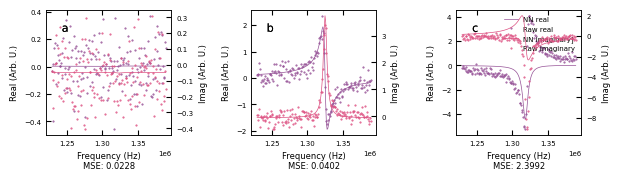

In [11]:
state = {
    "fitter": "LSQF",
    "raw_format": "complex",
    "resampled": True,
    "scaled": True,
    "output_shape": "index",
}

X_data, Y_data = dataset.NN_data()

d1, d2, index1, mse1 = BE_viz.bmw_nn(
    state,
    prediction=ADAHessian_model,
    out_state={"scaled": True, "measurement State": "complex"},
    returns=True,
    filename="Figure_12_NN_validation_full_data",
)

current_SHO_ranges: None
current_dataset_state: {'resampled': False, 'raw_format': 'complex', 'fitter': 'LSQF', 'scaled': False, 'output_shape': 'pixels', 'measurement_state': 'all', 'resampled_bins': 165, 'LSQF_phase_shift': None, 'NN_phase_shift': 1.5707963267948966, 'noise': 0, 'loop_interpolated': False}

        Dataset = Raw_Data
        Resample = False
        Raw Format = complex
        fitter = LSQF
        scaled = False
        Output Shape = pixels
        Measurement State = all
        Resample Resampled = False
        Resample Bins = 165
        LSQF Phase Shift = None
        NN Phase Shift = 1.5707963267948966
        Noise Level = 0
        loop interpolated = False
                    
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.png
./Figures/Figure_13_NN_Unscaled_Parameters_Histograms.svg


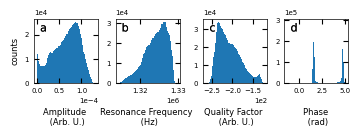

In [12]:
# we will add the appropriate phase shift to the dataset based on the fix seed,
# If your seed is different the results might vary
dataset.NN_phase_shift = np.pi/2 

# you can view the test and training dataset by replacing X_data with X_test or X_train
pred_data, scaled_param, parm = ADAHessian_model.predict(X_data)

BE_viz.SHO_hist(parm, filename="Figure_13_NN_Unscaled_Parameters_Histograms")

./Figures/Figure_15_NN_Switching_Maps.png
./Figures/Figure_15_NN_Switching_Maps.svg


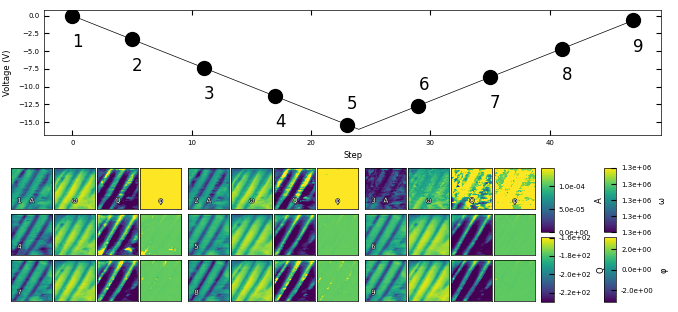

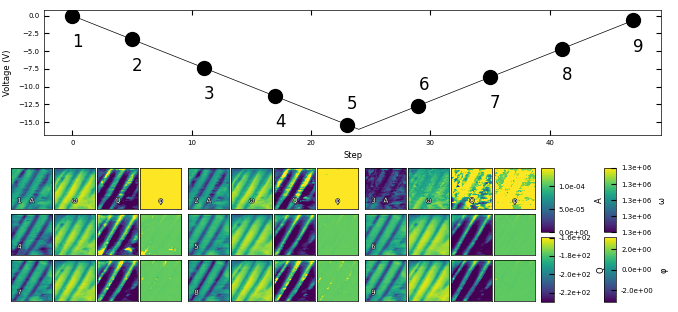

In [13]:
# you can view the test and training dataset by replacing X_data with X_test or X_train
pred_data, scaled_param, parm = ADAHessian_model.predict(X_data)

BE_viz.SHO_switching_maps(parm, filename="Figure_15_NN_Switching_Maps")

In [ ]:
dataset.NN_phase_shift = np.pi/2
dataset.LSQF_phase_shift = np.pi/2
dataset.measurement_state = "all"


true_state = {
    "fitter": "LSQF",
    "raw_format": "complex",
    "resampled": True,
    "scaled": True,
    "output_shape": "index",
    "measurement_state": "all",
}

out_state = {"scaled": True, "raw_format": "magnitude spectrum"}

n = 1

LSQF = BE_viz.get_best_median_worst(
    true_state,
    prediction={"fitter": "LSQF"},
    out_state=out_state,
    SHO_results=True,
    n=n,
)

NN = BE_viz.get_best_median_worst(
    true_state, prediction=ADAHessian_model, out_state=out_state, SHO_results=True, n=n
)

data = (LSQF, NN)
names = ["LSQF", "NN"]

BE_viz.SHO_Fit_comparison(
    data,
    names,
    model_comparison=[ADAHessian_model, {"fitter": "LSQF"}],
    out_state=out_state,
    filename="Figure_14_LSQF_NN_bmw_comparison",
    # display_results = None
)


        Dataset = Raw_Data
        Resample = True
        Raw Format = complex
        fitter = LSQF
        scaled = True
        Output Shape = index
        Measurement State = all
        Resample Resampled = True
        Resample Bins = 165
        LSQF Phase Shift = 1.5707963267948966
        NN Phase Shift = 1.5707963267948966
        Noise Level = 0
        loop interpolated = False
                    
None

        Dataset = Raw_Data
        Resample = True
        Raw Format = complex
        fitter = LSQF
        scaled = True
        Output Shape = index
        Measurement State = all
        Resample Resampled = True
        Resample Bins = 165
        LSQF Phase Shift = 1.5707963267948966
        NN Phase Shift = 1.5707963267948966
        Noise Level = 0
        loop interpolated = False
                    
None

        Dataset = Raw_Data
        Resample = True
        Raw Format = complex
        fitter = LSQF
        scaled = True
        Output Shape = index
  

In [ ]:
true_state = {
    "fitter": "LSQF",
    "raw_format": "complex",
    "resampled": True,
    "scaled": True,
    "output_shape": "index",
    "measurement_state": "all",
}


BE_viz.violin_plot_comparison(true_state, ADAHessian_model, X_data, filename="Figure_16_Violin") 